# TP3 
<img src="images/img0.PNG"/>

Si f est une fonction continue sur un intervalle <b>[a,b]</b>, bien souvent on ne sait pas calculer une primitive de f. Ainsi, si l'on désire obtenir la valeur de <img src="images/fonction.PNG"/>il faut parfois se contenter d'obtenir une valeur approchée à l'aide d'une méthode d'intégration numérique.
 La plupart des méthodes d'intégration numérique fonctionnent sur le même principe. On commence par couper le gros intervalle <b>[a,b]</b> en N plus petits intervalles<b> [ai,ai+1]</b>, avec <b>a1=a</b> et <b>aN+1=b</b>. Puis, pour chaque intervalle <b>[ai,ai+1]</b>.
on essaie d'approcher<img src="images/f2.PNG"/>
les moyens les plus simples:


<img src="images/img1.PNG"/>

In [55]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [56]:
f=lambda x:1/(1+x**2)

<b>la méthode des rectangles à gauche </b>: on approche <img src="images/f3.PNG" />
Géométriquement, cela signifie qu'on approche l'intégrale de f par l'aire des rectangles <b>hachurés en vert </b>
<img src="images/rectangleG.PNG"/>
<b>la méthode des rectangles à droite</b> : on approche<img src="images/f4.PNG" />
Géométriquement, cela signifie qu'on approche l'intégrale de f par l'aire des rectangles hachurés en rouge :
<img src="images/rectangleD.PNG" />

In [57]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

    

In [58]:
R=RectangleG(-1,1,55,f)

In [59]:
R.integrate(f)

1.5706861339597253

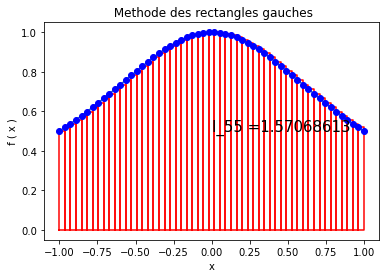

In [60]:
R.Graph(f)

In [61]:
np.pi/2


1.5707963267948966

In [62]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [63]:
def simul(n,f):
    R=RectangleG(-1,1,n,f)
    return R.Graph(f)

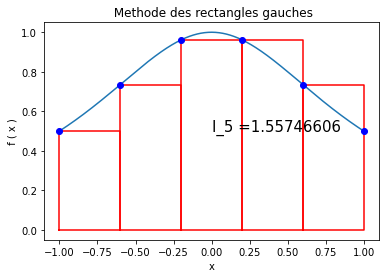

In [64]:
simul(5,f)

In [65]:
interact(simul,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

<b>la méthode des trapèzes:</b>  on approche <img src="images/f6.PNG"/>
Géométriquement, cela signifie qu'on approche l'intégrale de f par l'aire des trapèzes <b>hachurés en marron</b> :<img src="images/trapeze.PNG" />

In [66]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des Trapèzes' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [67]:
T=Trapezoidal(-1,1,55,f)

In [68]:
T.integrate(f)

1.5706861339597256

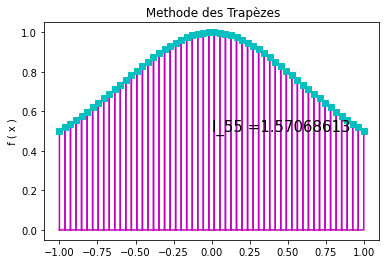

In [69]:
T.Graph(f)

<b>La méthode de Simpson</b> est une méthode de calcul approché d'intégrale. Elle consiste en l'approximation suivante :<img src="images/f7.PNG" />Cette formule est exacte pour tous les polynômes de degré inférieur ou égal à 3 : on dit que la méthode de Simpson est d'ordre <b>3</b>.

En général, pour appliquer cette méthode d'intégration, on découpe l'intervalle <b>[a,b]</b> en n intervalles de longueur <b>(b−a)/n</b> , et on applique la formule précédente sur chacun des sous-intervalles. On a alors, en posant <b> h=(b−a)/n</b> :
<img src="images/f8.PNG" />    
<img src="images/simpson.PNG"/>

In [70]:
class Simps ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        
        if self.n % 2 == 1:
            raise ValueError("N doit étre paire ! ")
        dx = (self.b-self.a)/self.n
        x = np.linspace(self.a,self.b,self.n+1)
        y = f(x)
        S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
        return S
        
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ]] # abscisses des sommets
            y_rect = [0 , yl[ i ]] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title('Methode de Simpson, N = {}'.format(self.n))
        plt.text( 2*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [71]:
S=Simps(-1,1,20,f)

In [72]:
S.integrate(f)

1.5707963069696076

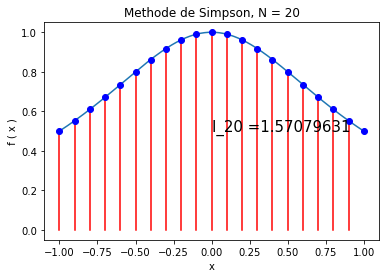

In [73]:
S.Graph(f)

<b>la méthode du point milieu</b> : on approche<img src="images/f5.PNG"/>
Géométriquement, cela signifie qu'on approche l'intégrale de f par l'aire des rectangles hachurés en bleu :
<img src="images/milieu.PNG"/>

In [80]:
class Milieu(object): 
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        h = float(x[1] - x[0])
        s=0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s
       
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl=f(xl);
        xlist_fine=np.linspace(self.a, self.b, resolution)        
        for i in range(self.n):            
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] 
            y_rect = [0  , f(m), f(m)  , 0 , 0 ] 
            plt.plot(x_rect, y_rect,"r")
            plt.plot(m,f(m),"b*")
            
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,'g')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Milieu')
        

In [81]:
M=Milieu(-1,1,50,f)

In [82]:
M.integrate(f)

1.5708629934576281

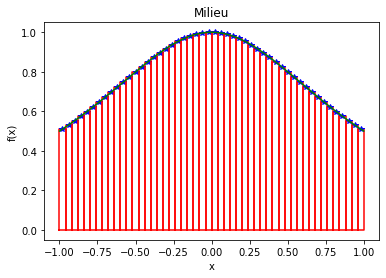

In [83]:
M.Graph(f)

In [84]:
import matplotlib.pyplot as plt
def sim(n,f):
    R=RectangleG(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f) 
    S=Simps(-1,1,n,f)
    M=Milieu(-1,1,n,f)
    fig= plt.figure(figsize=(12,4))
    plt.subplot(221)
    R.Graph(f)  
    plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.9, top = 0.9, wspace = 0.1, hspace = 2)
    plt.subplot(222)    
    T.Graph(f)
    
    plt.subplot(223)    
    S.Graph(f)
    
    plt.subplot(224)    
    M.Graph(f)
    
    plt.show()

In [85]:
interact(sim,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…